In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import LocalOutlierFactor
#--Load
df = pd.read_csv('../data/ff1_spells.csv', encoding='latin1')
df = df[['level', 'mp', 'power', 'accuracy', 'target', 'price']]
print(df.values)
print(df.dtypes)

[[1 5 10 24 'One enemy' 100]
 [1 5 10 24 'One enemy' 100]
 [1 3 20 64 'One enemy' 100]
 [1 3 0 24 'All enemies' 100]
 [2 5 0 24 'All enemies' 400]
 [2 8 20 24 'One enemy' 400]
 [2 5 0 64 'All enemies' 400]
 [2 8 14 0 'One ally' 400]
 [3 15 30 24 'All enemies' 1500]
 [3 10 0 64 'One enemy' 1500]
 [3 10 30 24 'All enemies' 1500]
 [3 10 20 40 'All enemies' 1500]
 [4 15 0 64 'All enemies' 4000]
 [4 15 0 0 'One ally' 4000]
 [4 18 40 24 'All enemies' 4000]
 [4 15 0 64 'One enemy' 4000]
 [5 28 0 40 'All enemies' 8000]
 [5 30 50 24 'All enemies' 8000]
 [5 18 0 64 'One enemy' 8000]
 [5 5 0 255 'All allies' 8000]
 [6 35 60 40 'All enemies' 20000]
 [6 32 0 40 'All enemies' 20000]
 [6 30 0 24 'One enemy' 20000]
 [6 20 0 0 'One enemy' 20000]
 [7 25 0 0 'One enemy' 45000]
 [7 30 0 64 'One enemy' 45000]
 [7 40 70 24 'All enemies' 45000]
 [7 25 16 0 'Self' 45000]
 [8 50 100 107 'All enemies' 60000]
 [8 30 0 48 'All enemies' 60000]
 [8 40 0 0 'One enemy' 60000]
 [8 30 0 32 'All enemies' 60000]
 [1 3 16

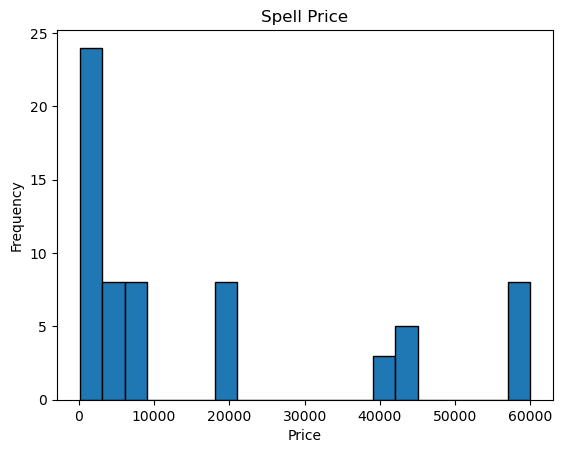

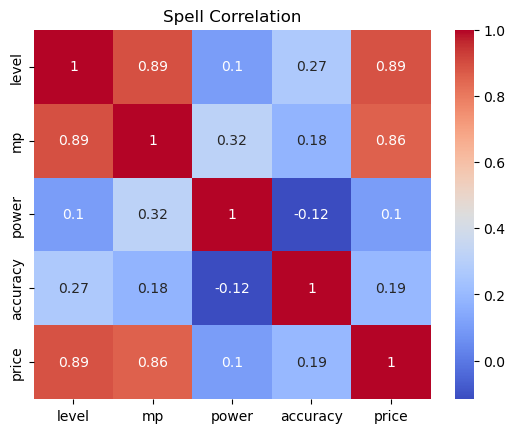

In [21]:
#--EDA
#Histogram of price
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Spell Price')
plt.show()

#Correlation plot
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Spell Correlation')
plt.show()

In [22]:
#--Data Processing
#One hot encoder
encoder = OneHotEncoder()
target_encoded = encoder.fit_transform(df[['target']])

#PCA
pca = PCA(n_components=1)
target_pca = pca.fit_transform(target_encoded)

#Add to dataframe
df['target_pca'] = target_pca
df = df.drop(columns=['target'])

#Outlier detection
clf = LocalOutlierFactor()
outliers = clf.fit_predict(df)

#Count outliers
num_outliers = np.sum(outliers == -1)
print("Number of outliers in dataset:", num_outliers)

#Seperate x and y
X = df.drop(columns=['price'])
y = df['price']

#--Feature Selection
f_scores, p_values = f_regression(X, y)
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "F-Score": f_scores,
    "P-Value": p_values
})
print("\nFeature Selection Scores:")
print(feature_scores)

#--Train Dummy Model
dummy = DummyRegressor(strategy="mean")
dummy.fit(X, y)

#Predict with given features [1, 5, 20, 50, 0.5]
#Corresponds to: [level, mp, power, accuracy, target_pca]
test_input = np.array([[1, 5, 20, 50, 0.5]])
predicted_price = dummy.predict(test_input)
print("\nPredicted price:", predicted_price[0])

Number of outliers in dataset: 24

Feature Selection Scores:
      Feature     F-Score       P-Value
0       level  237.902397  6.765448e-23
1          mp  175.768503  9.345348e-20
2       power    0.664253  4.181824e-01
3    accuracy    2.405544  1.259961e-01
4  target_pca    0.024021  8.773355e-01

Predicted price: 17140.625


In [23]:
print(df.isnull().any())
print(df.isnull().sum())
print("Skewness:", df["price"].skew())
print(f'variance explained: {pca.explained_variance_ratio_}')
dummy.score(X=X, y=y)

level         False
mp            False
power         False
accuracy      False
price         False
target_pca    False
dtype: bool
level         0
mp            0
power         0
accuracy      0
price         0
target_pca    0
dtype: int64
Skewness: 1.0772614113673884
variance explained: [0.41613412]


0.0